Vamos a ver qué tipo de preparación y estandarización o normalización es necesaria para algunas columnas de los datasets experimentales que introdujimos en la clase pasada. 

Empecemos por el dataset de vacunación.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/LaboDatos2021/vacunas_safe.csv' 

df = pd.read_csv(filename)

Mounted at /content/drive


Vamos a cargar las columnas dadas por:

0_vacunaAplicada,	0_preTeDarias,	0_preEfectiva,	0_preEfectosAdversos,
0_vacunaUtilFrenar,	0_riesgoPropio,	0_riesgoConvive,	0_posturaVacunas, 0_covid', 0_medios, 0_diarios, 0_otros, 0_podcasts, 0_radio, 0_redesSociales,0_television, 0_youtube, 0_edad, 0_genero, hash

In [ ]:
df.columns
columnas = list(df.columns[4:8]) + list(df.columns[19:34]) + ['hash']
df_vacunas = df[columnas]


La primera columna nos sirve para filtrar a aquellos que ya se dieron la vacuna.

In [ ]:
import numpy as np

print(df_vacunas['0_vacunaAplicada'].value_counts())
# -999: no fue vacunado
# los otros numeros indican vacunado con distintas vacunas

indice_no_vacunado = np.logical_not(df_vacunas['0_vacunaAplicada']==-999)
df_vacunados = df_vacunas.drop(df_vacunas[indice_no_vacunado].index)

print(df_vacunados['0_vacunaAplicada'].value_counts())


-999    6377
 1       211
 4        52
 2        45
 7        13
 3         5
 5         1
Name: 0_vacunaAplicada, dtype: int64
-999    6377
Name: 0_vacunaAplicada, dtype: int64


Otra cosa que podría pasar es que nos interese el z-score de las columnas '0_preTeDarias' (¿te darías la vacuna?) y '0_preEfectiva' (¿considerás que la vacuna es efectiva para frenar la pandemia?). 

El problema es que por un sesgo en la gente que responde estas variables, vemos que una gran cantidad respondió 100 (máxima certeza) en ambas preguntas.

In [ ]:
print(df_vacunados['0_preTeDarias'].value_counts())
print(df_vacunados['0_preEfectiva'].value_counts())

100    3676
99      231
0       188
98      125
97       82
       ... 
11        5
6         5
17        5
5         4
8         4
Name: 0_preTeDarias, Length: 101, dtype: int64
100    1861
99      157
85      123
83      122
72      120
       ... 
6         3
4         3
5         2
16        2
12        2
Name: 0_preEfectiva, Length: 100, dtype: int64


Entonces podemos remover esta gente tan decidida y luego calcular z-scores.

In [ ]:
from scipy import stats

indice_seguros = np.logical_and(df_vacunados['0_preTeDarias']==100, df_vacunados['0_preEfectiva']==100)
df_vacunados = df_vacunados.drop(df_vacunados[indice_seguros].index)

df_vacunados['0_preTeDarias (z)'] = stats.zscore(df_vacunados['0_preTeDarias'])
df_vacunados['0_preEfectiva (z)'] = stats.zscore(df_vacunados['0_preEfectiva'])

print(df_vacunados)


      0_vacunaAplicada  0_preTeDarias  ...  0_preTeDarias (z)  0_preEfectiva (z)
0                 -999             99  ...           0.684339           1.232476
1                 -999            100  ...           0.718244           0.048990
2                 -999             98  ...           0.650433           0.995778
3                 -999             76  ...          -0.095489           0.711742
4                 -999            100  ...           0.718244           0.522384
...                ...            ...  ...                ...                ...
6696              -999             98  ...           0.650433          -0.519084
6697              -999             58  ...          -0.705789          -0.566423
6699              -999              0  ...          -2.672311           0.475045
6702              -999            100  ...           0.718244           1.185136
6703              -999            100  ...           0.718244           0.759081

[4791 rows x 22 columns]


Lo mismo se puede hacer con las otras columnas numéricas. 

Hay columnas más complicadas, donde en el experimento aparecen cajas de texto y los participantes pueden escribir, como en preguntas relacionadas a consumo de diarios, redes sociales o podcasts.

In [ ]:
pd.options.display.max_rows = 2000
#print(df_vacunados['0_diarios'].value_counts())
#print(df_vacunados['0_redesSociales'].value_counts())
print(df_vacunados['0_television'].value_counts())



-999                                                                                                          3378
3                                                                                                              343
1                                                                                                              223
6                                                                                                              169
5                                                                                                              127
2                                                                                                              125
8                                                                                                               49
4                                                                                                               48
23                                                                              

Cada número representa una elección en un menú dropdown (desplegable)


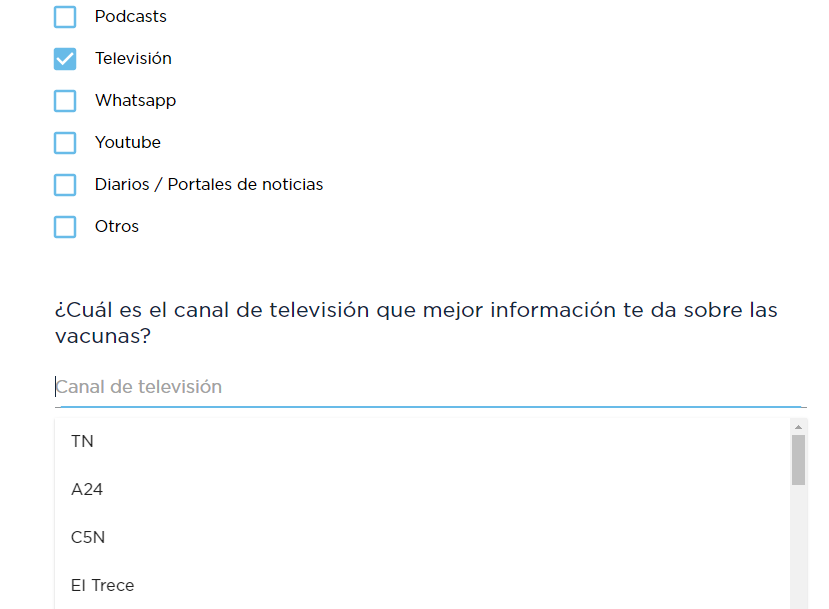

Pero algunas personas ingresaron manualmente el medio o la red social correspondiente, y hay que hacer un trabajo similar al que hicimos en los notebooks anteriores para limpiarlo.